<a href="https://colab.research.google.com/github/DietRecall/ML_Project/blob/main/EDA%20on%20Nutritional%20facts%20for%20most%20common%20foods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
from plotly.offline import iplot

In [3]:

food = pd.read_csv("/content/archive (2).zip")

Checking null values

In [4]:
food.isnull().sum()

Food        0
Measure     0
Grams       0
Calories    1
Protein     0
Fat         0
Sat.Fat     2
Fiber       0
Carbs       0
Category    0
dtype: int64

In [5]:
df=pd.DataFrame(food)

Dropping unnecessary columns

In [6]:
food1=df.drop(labels=['Category', 'Grams', 'Sat.Fat'],axis=1)
food1.head()

,Food,Measure,Calories,Protein,Fat,Fiber,Carbs
0,Cows' milk,1 qt.,660,32,40,0,48
1,Milk skim,1 qt.,360,36,t,0,52
2,Buttermilk,1 cup,127,9,5,0,13
3,"Evaporated, undiluted",1 cup,345,16,20,0,24
4,Fortified milk,6 cups,"1,373",89,42,1.4,119


In [7]:
food1.isnull().sum()

Food        0
Measure     0
Calories    1
Protein     0
Fat         0
Fiber       0
Carbs       0
dtype: int64

Replacing null values

In [8]:
food1["Calories"].fillna(method='ffill',inplace=True)

Checking null values

In [9]:
food1.isnull().sum()

Food        0
Measure     0
Calories    0
Protein     0
Fat         0
Fiber       0
Carbs       0
dtype: int64

As the data consists of strings we don't get mean and sd

In [10]:

food1.describe()

,Food,Measure,Calories,Protein,Fat,Fiber,Carbs
count,335,335,335,335,335,335,335
unique,329,61,152,40,45,57,80
top,Butter,1 cup,100,1,t,0,0
freq,3,120,14,53,115,116,45


In [11]:
food1.shape

(335, 7)

To check duplicate values

In [12]:
food1[food1.duplicated(keep='first')]


,Food,Measure,Calories,Protein,Fat,Fiber,Carbs


In [13]:
food1.dtypes

Food        object
Measure     object
Calories    object
Protein     object
Fat         object
Fiber       object
Carbs       object
dtype: object

Converting object datatype to float

In [14]:
food1['Calories'] = pd.to_numeric(food1['Calories'],errors='coerce')



In [15]:
food1['Protein'] = pd.to_numeric(food1['Protein'],errors='coerce')


In [16]:
food1['Fat'] = pd.to_numeric(food1['Fat'],errors='coerce')


In [17]:
food1['Fiber'] = pd.to_numeric(food1['Fiber'],errors='coerce')


In [18]:
food1['Carbs'] = pd.to_numeric(food1['Carbs'],errors='coerce')

plotting of required columns

<ipython-input-19-505459d25e36>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




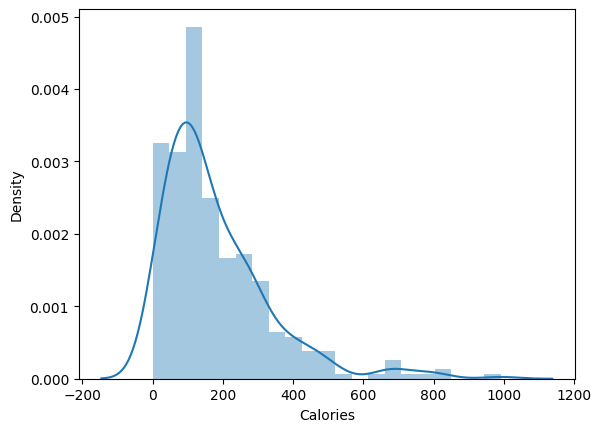

In [19]:

sns.distplot(food1['Calories'])
plt.show()

<ipython-input-20-88d01643990e>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




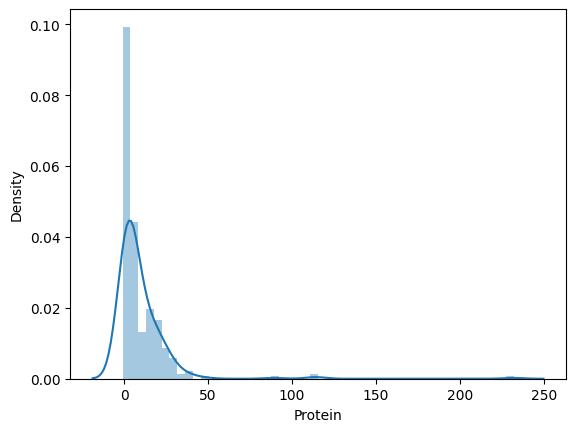

In [20]:
sns.distplot(food1['Protein'])
plt.show()

<ipython-input-21-0d6a256eb117>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




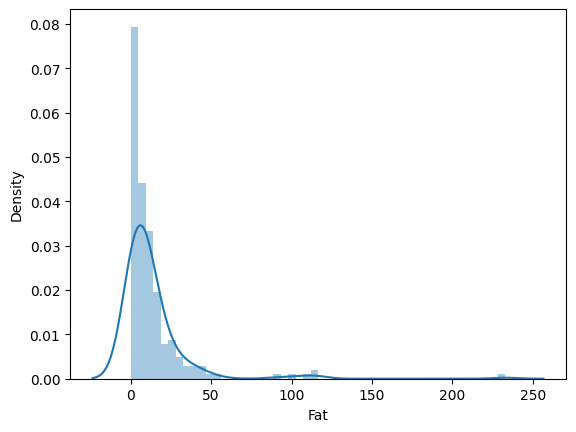

In [21]:
sns.distplot(food1['Fat'])
plt.show()

<ipython-input-22-0a469e696cc9>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




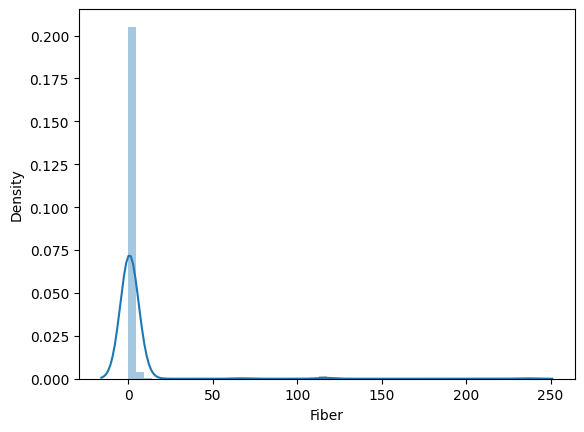

In [22]:
sns.distplot(food1['Fiber'])
plt.show()

<ipython-input-23-ec257aee3246>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




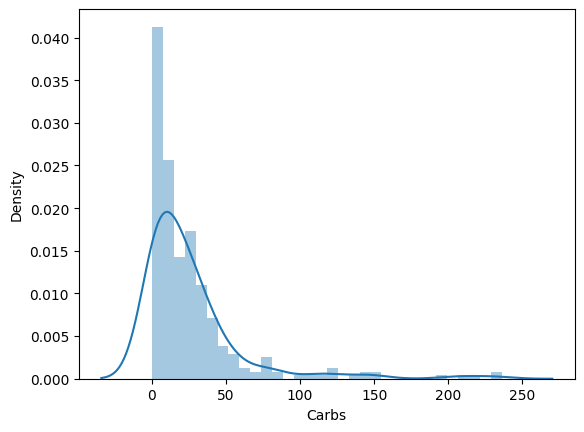

In [23]:
sns.distplot(food1['Carbs'])
plt.show()

Correlation

In [24]:
i1=food1.corr()
i1

<ipython-input-24-cdf3281cc261>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Calories,Protein,Fat,Fiber,Carbs
Calories,1.000000,0.171464,0.452906,-0.009911,0.528412
Protein,0.171464,1.000000,0.762313,0.843994,0.410208
Fat,0.452906,0.762313,1.000000,0.749886,0.335214
Fiber,-0.009911,0.843994,0.749886,1.000000,0.461462
Carbs,0.528412,0.410208,0.335214,0.461462,1.000000


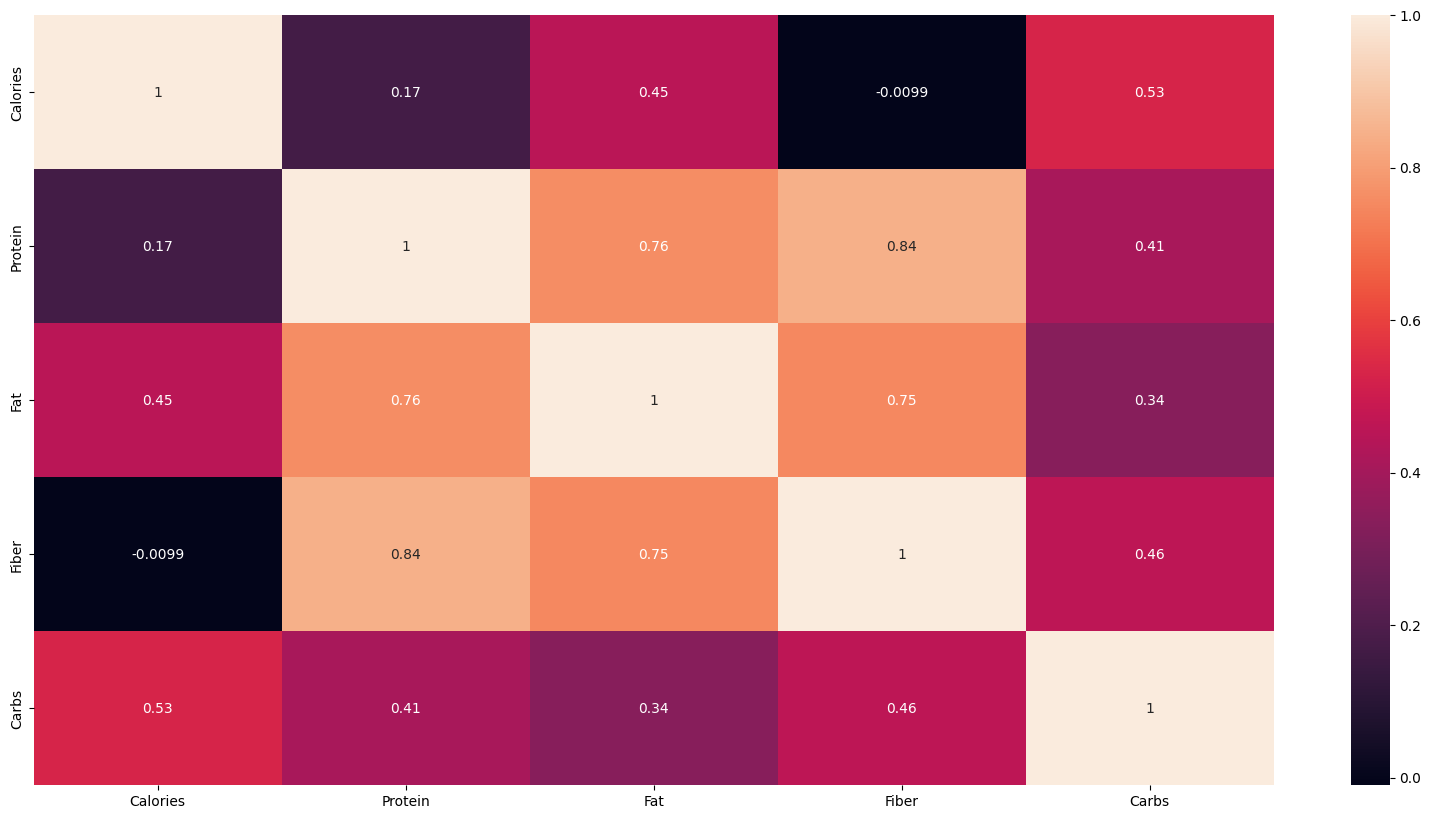

In [25]:
plt.figure(figsize=(20, 10))
sns.heatmap(i1, annot=True)
plt.show()

CONCLUSION

This dataset contains Food,Measure,grams,Calories	Protein,Fat,sat-fat,Fiber,Carbs,category columns.we removed unnecessary columns like grams,sat-fat,category. we checked null values and replaced those null values.And this dataset has no duplicate values.
We converted required column's datatype from object to float.Then  we drew distplot for required columns.Finally,we performed correlation and drew a 
heatmap.